In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Installing and importing dependencies

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
#import stopword
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize


import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning and prepping dataset

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TA Coba/datasetedom3.csv')
df = df.rename(columns={'ulasan': 'clean_text', 'sentimen':'category'})
# Output first five rows
df.head()

,clean_text,category
0,Enggak tau hehe :D,1.0
1,Berharap melakukan kuliah offline untuk semest...,1.0
2,Masuk kelas agar tidak jamkos terus,0.0
3,Cukup baik dalam penyampaian materi,2.0
4,Pa Aryanto cukup jelas memberikan pembahasan.,2.0


In [ ]:
# Check for missing data
df.isnull().sum()

clean_text    0
category      8
dtype: int64

In [ ]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [ ]:
# dimensionality of the data
df.shape

(8104, 2)

In [ ]:
# Map categories
df['category'] = df['category'].map({0.0:'Kurang',1.0:'Cukup', 2.0:'Baik', 3.0:'Sangat Baik'})

# Output first five rows
df.head()

,clean_text,category
0,Enggak tau hehe :D,Cukup
1,Berharap melakukan kuliah offline untuk semest...,Cukup
2,Masuk kelas agar tidak jamkos terus,Kurang
3,Cukup baik dalam penyampaian materi,Baik
4,Pa Aryanto cukup jelas memberikan pembahasan.,Baik


## Exploratory Data Analysis

Data Visualisation-

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart')
fig.show()

## Data Preprocessing

In [ ]:
dwlr = nltk.downloader.Downloader()

for pkg in dwlr.corpora():
    dwlr._status_cache[pkg.id] = 'installed'

dwlr.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
def text_to_words(text):
    ''' Convert text into a sequence of words '''
    
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("indonesian")]
    # apply stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = [stemmer.stem(w) for w in words]
    # return list
    return words

print("\nOriginal ->", df['clean_text'][5])
print("\nProcessed  ->", text_to_words(df['clean_text'][5]))


Original -> Saran saya jika memberi materi kalimatnya agar dipermudah agar lebih mudah dipahami

Processed  -> ['saran', 'materi', 'kalimat', 'mudah', 'mudah', 'paham']


In [ ]:
# Apply data processing
X = list(map(text_to_words, df['clean_text']))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [ ]:
print(X[5])
print(Y[5])

['saran', 'materi', 'kalimat', 'mudah', 'mudah', 'paham']
2


### Train and test split

In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

###feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = TfidfVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True)

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)

In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['1', '10', '1kelas', '2', '25', '2d', '2x', '3', '30', '40k', '5', '6', '7', '70', '75', 'a', 'abar', 'abreg', 'abrek', 'absen', 'acc', 'ada', 'adain', 'adakan', 'aidzin', 'aja', 'ajak', 'ajar', 'ajiiibbb', 'akrab', 'akt', 'aktif', 'akuntansi', 'akutansi', 'alam', 'alami', 'alangkah', 'alas', 'alur', 'ambil', 'ananto', 'and', 'anggar', 'angka', 'anita', 'anitta', 'antuk', 'apa', 'apa2', 'arief', 'arif', 'aryanto', 'asa', 'asik', 'asliii', 'asrofi', 'assalamualaikum', 'asyikkkk', 'atur', 'audit', 'awam', 'b', 'bab', 'baca', 'backsongnya', 'baekk', 'bagi', 'baguk', 'bagus', 'baguss', 'bagusss', 'baguusss', 'bahan', 'bahas', 'bahasa', 'baii', 'baik', 'baikk', 'baikkk', 'baikkkk', 'baja', 'bales', 'banding', 'banget', 'bangt', 'bantu', 'banyak', 'banyakin', 'bapa', 'bapakkk', 'barang', 'barangkali', 'batas', 'bawa', 'bayang', 'bayar', 'beban', 'becanda', 'beda', 'bekal', 'beliau', 'benar2', 'bentuk', 'beri', 'berwirausaha', 'best', 'bgt', 'bgttt', 'biar', 'bicara', 'bikin', 'bilang', 'bim

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Tokenizing & Padding

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Enggak tau hehe :D
After Tokenization & Padding 
 [679 249 165 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


### Saving tokenized data

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Train & Test Split

In [ ]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (4862, 50) (4862, 4)
Validation Set -> (1621, 50) (1621, 4)
Test Set -> (1621, 50) (1621, 4)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## LSTM Using NN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=25
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
print(model.summary())


# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_4 (Conv1D)           (None, 50, 32)            3104      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 25, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                

### Model Confusion Matrix, Accuracy & Loss

In [ ]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(y_test, predicted_bi_lstm.round()))

precision: [0.96261682 0.95922747 1.         0.96907216]
recall: [0.88412017 0.98893805 0.98056156 0.99365751]
fscore: [0.92170022 0.97385621 0.99018539 0.98121086]
support: [233 452 463 473]
################################
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       233
           1       0.96      0.99      0.97       452
           2       1.00      0.98      0.99       463
           3       0.97      0.99      0.98       473

   micro avg       0.97      0.97      0.97      1621
   macro avg       0.97      0.96      0.97      1621
weighted avg       0.97      0.97      0.97      1621
 samples avg       0.97      0.97      0.97      1621



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9741
Precision : 0.9741
Recall    : 0.9729
F1 Score  : 0.9735


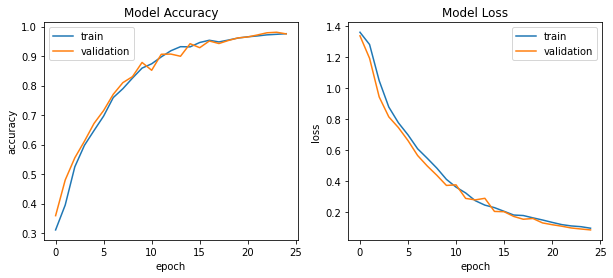

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

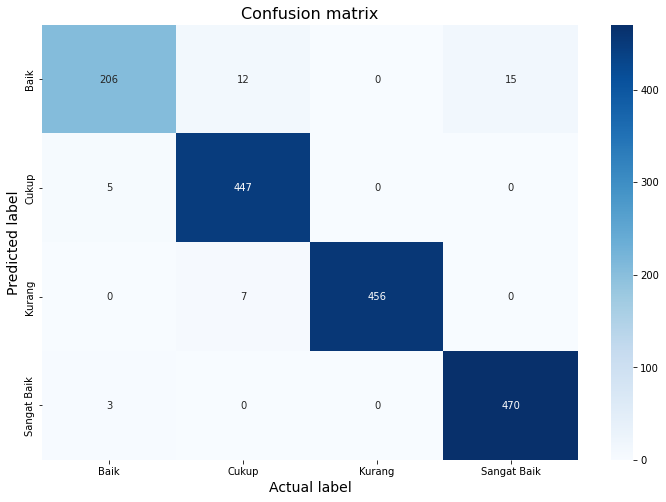

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Baik', 'Cukup', 'Kurang', 'Sangat Baik']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=14)
    plt.ylabel('Predicted label', fontsize=14)
    
plot_confusion_matrix(model, X_test, y_test)

### Model save and load for the prediction

In [ ]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [ ]:
from nltk import probability
from matplotlib.axis import XTick
from numpy.ma.core import array
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Baik', 'Cukup', 'Kurang', 'Sangat Baik']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment

    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class(['"Bu dosen baik bngt dan materinya juga jelas bngt"'])

The predicted sentiment is Sangat Baik


In [ ]:
predict_class(['jarang bisa masuk ngajar "'])

The predicted sentiment is Kurang


In [ ]:
predict_class(['dosen jarang masuk, tetapi ngasih tugas mulu "'])

The predicted sentiment is Kurang


In [ ]:
predict_class(['materi mudah dosen susah"'])

The predicted sentiment is Cukup


In [ ]:
predict_class(['dosen susah materi mudah"'])

The predicted sentiment is Cukup
